## Assign Libraries

In [1]:
import itertools
import random
import numpy as np
import pandas as pd
from sklearn import preprocessing

In [2]:
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
import seaborn as sns
from matplotlib.ticker import NullFormatter

C:\Users\a_klebeko\AppData\Local\Continuum\anaconda3\lib\site-packages\statsmodels\tools\_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [3]:
%matplotlib inline

In [4]:
random.seed(42)

## Examine data

In [5]:
df_train = pd.read_csv('loan_train.csv')
df_test = pd.read_csv('loan_test.csv')
df = pd.concat([df_train, df_test], ignore_index = True)
del df_train, df_test
df['due_date'] = pd.to_datetime(df['due_date'])
df['effective_date'] = pd.to_datetime(df['effective_date'])
df.head()
print('Shape: ', df.shape)
df.head()

Shape:  (400, 10)


,Unnamed: 0,Unnamed: 0.1,loan_status,Principal,terms,effective_date,due_date,age,education,Gender
0,0,0,PAIDOFF,1000,30,2016-09-08,2016-10-07,45,High School or Below,male
1,2,2,PAIDOFF,1000,30,2016-09-08,2016-10-07,33,Bechalor,female
2,3,3,PAIDOFF,1000,15,2016-09-08,2016-09-22,27,college,male
3,4,4,PAIDOFF,1000,30,2016-09-09,2016-10-08,28,college,female
4,6,6,PAIDOFF,1000,30,2016-09-09,2016-10-08,29,college,male


In [6]:
df.columns

Index(['Unnamed: 0', 'Unnamed: 0.1', 'loan_status', 'Principal', 'terms',
       'effective_date', 'due_date', 'age', 'education', 'Gender'],
      dtype='object')

In [7]:
df.dtypes

Unnamed: 0                 int64
Unnamed: 0.1               int64
loan_status               object
Principal                  int64
terms                      int64
effective_date    datetime64[ns]
due_date          datetime64[ns]
age                        int64
education                 object
Gender                    object
dtype: object

In [8]:
df.describe()

,Unnamed: 0,Unnamed: 0.1,Principal,terms,age
count,400.000000,400.000000,400.00000,400.000000,400.000000
mean,199.500000,199.500000,939.75000,22.550000,31.060000
std,115.614301,115.614301,120.33761,8.100094,6.033441
min,0.000000,0.000000,300.00000,7.000000,18.000000
25%,99.750000,99.750000,800.00000,15.000000,27.000000
50%,199.500000,199.500000,1000.00000,30.000000,30.000000
75%,299.250000,299.250000,1000.00000,30.000000,35.000000
max,399.000000,399.000000,1000.00000,30.000000,51.000000


In [9]:
df.isnull().sum()

Unnamed: 0        0
Unnamed: 0.1      0
loan_status       0
Principal         0
terms             0
effective_date    0
due_date          0
age               0
education         0
Gender            0
dtype: int64

In [10]:
df['loan_status'].value_counts()

PAIDOFF       300
COLLECTION    100
Name: loan_status, dtype: int64

In [11]:
df['education'].value_counts()

college                 172
High School or Below    172
Bechalor                 52
Master or Above           4
Name: education, dtype: int64

In [12]:
df.groupby(['Gender'])['loan_status'].value_counts(normalize=True)

Gender  loan_status
female  PAIDOFF        0.841270
        COLLECTION     0.158730
male    PAIDOFF        0.732938
        COLLECTION     0.267062
Name: loan_status, dtype: float64

In [13]:
df.groupby(['education'])['loan_status'].value_counts()

education             loan_status
Bechalor              PAIDOFF         41
                      COLLECTION      11
High School or Below  PAIDOFF        123
                      COLLECTION      49
Master or Above       PAIDOFF          3
                      COLLECTION       1
college               PAIDOFF        133
                      COLLECTION      39
Name: loan_status, dtype: int64

In [14]:
df.groupby(['education'])['loan_status'].value_counts(normalize=True)

education             loan_status
Bechalor              PAIDOFF        0.788462
                      COLLECTION     0.211538
High School or Below  PAIDOFF        0.715116
                      COLLECTION     0.284884
Master or Above       PAIDOFF        0.750000
                      COLLECTION     0.250000
college               PAIDOFF        0.773256
                      COLLECTION     0.226744
Name: loan_status, dtype: float64

Visualization

Distribution of 'loan_status' by 'Gender' within 'Principal' bins



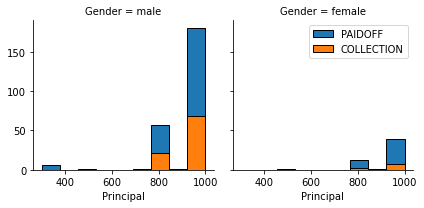

In [15]:
print("Distribution of 'loan_status' by 'Gender' within 'Principal' bins\n")
bins = np.linspace(df.Principal.min(), df.Principal.max(), 10)
fig_01 = sns.FacetGrid(data = df, col = 'Gender', hue = 'loan_status', col_wrap=2)
fig_01.map(plt.hist, 'Principal', bins = bins, ec = "k")
fig_01.axes[-1].legend()
plt.show()

Distribution of 'loan_status' by 'Gender' within 'Age' bins



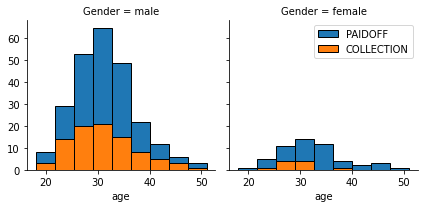

In [16]:
print("Distribution of 'loan_status' by 'Gender' within 'Age' bins\n")
bins = np.linspace(df.age.min(), df.age.max(), 10)
fig_01 = sns.FacetGrid(data = df, col = 'Gender', hue = 'loan_status', col_wrap=2)
fig_01.map(plt.hist, 'age', bins = bins, ec = "k")
fig_01.axes[-1].legend()
plt.show()

Distribution of 'loan_status' by 'Education' within 'Principal' bins



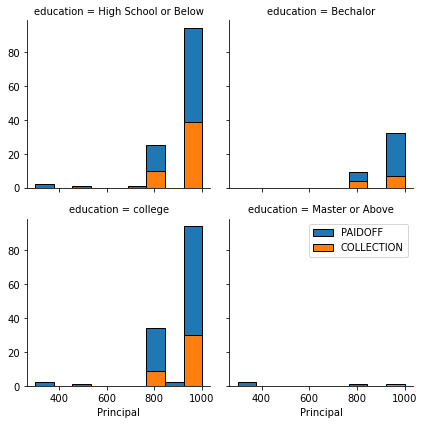

In [17]:
print("Distribution of 'loan_status' by 'Education' within 'Principal' bins\n")
bins = np.linspace(df.Principal.min(), df.Principal.max(), 10)
fig_01 = sns.FacetGrid(data = df, col = 'education', hue = 'loan_status', col_wrap=2)
fig_01.map(plt.hist, 'Principal', bins = bins, ec = "k")
fig_01.axes[-1].legend()
plt.show()

Distribution of 'loan_status' by 'Education' within 'Age' bins



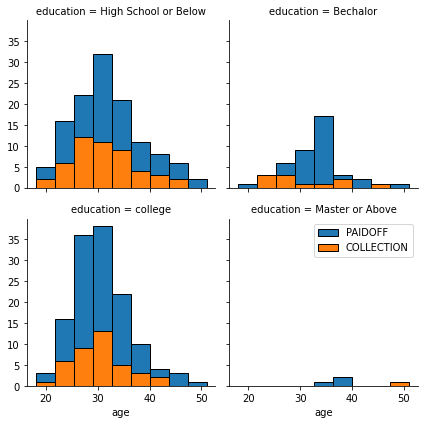

In [18]:
print("Distribution of 'loan_status' by 'Education' within 'Age' bins\n")
bins = np.linspace(df.age.min(), df.age.max(), 10)
fig_01 = sns.FacetGrid(data = df, col = 'education', hue = 'loan_status', col_wrap=2)
fig_01.map(plt.hist, 'age', bins = bins, ec = "k")
fig_01.axes[-1].legend()
plt.show()

## Feature engineering

In [19]:
df_upd = df.copy()
df_upd['dayofweek'] = df_upd['effective_date'].dt.dayofweek
df_upd['weekend'] = df_upd['dayofweek'].apply(lambda x: 1 if (x > 3)  else 0)
df_upd['Gender'].replace(to_replace = ['male','female'], value = [0,1], inplace = True)
df_upd['paid'] = df_upd['loan_status'].replace(to_replace = ['PAIDOFF', 'COLLECTION'], value = [1, 0])
df_upd.head()

,Unnamed: 0,Unnamed: 0.1,loan_status,Principal,terms,effective_date,due_date,age,education,Gender,dayofweek,weekend,paid
0,0,0,PAIDOFF,1000,30,2016-09-08,2016-10-07,45,High School or Below,0,3,0,1
1,2,2,PAIDOFF,1000,30,2016-09-08,2016-10-07,33,Bechalor,1,3,0,1
2,3,3,PAIDOFF,1000,15,2016-09-08,2016-09-22,27,college,0,3,0,1
3,4,4,PAIDOFF,1000,30,2016-09-09,2016-10-08,28,college,1,4,1,1
4,6,6,PAIDOFF,1000,30,2016-09-09,2016-10-08,29,college,0,4,1,1


In [20]:
# education "one hot encoding"
df_upd = pd.concat([df_upd, pd.get_dummies(df_upd['education'])], axis = 1)
df_upd.drop(columns = ['education', 'Unnamed: 0', 'Unnamed: 0.1', 'Master or Above', 'effective_date', 'due_date', 'loan_status'], inplace = True)
df_upd.columns = ['principal', 'terms', 'age', 'gender', 'dayofweek', 'weekend', 'paid', 'bechalor', 'school', 'college']
df_upd.head()

,principal,terms,age,gender,dayofweek,weekend,paid,bechalor,school,college
0,1000,30,45,0,3,0,1,0,1,0
1,1000,30,33,1,3,0,1,1,0,0
2,1000,15,27,0,3,0,1,0,0,1
3,1000,30,28,1,4,1,1,0,0,1
4,1000,30,29,0,4,1,1,0,0,1


In [21]:
df_upd.groupby(['weekend'])['paid'].value_counts(normalize=True)

weekend  paid
0        1       0.975155
         0       0.024845
1        1       0.598326
         0       0.401674
Name: paid, dtype: float64

In [22]:
df_upd.groupby(['dayofweek'])['paid'].value_counts(normalize=True)

dayofweek  paid
0          1       0.960396
           0       0.039604
1          1       1.000000
2          1       1.000000
3          1       1.000000
4          0       0.500000
           1       0.500000
5          0       0.512821
           1       0.487179
6          1       0.626316
           0       0.373684
Name: paid, dtype: float64

In [23]:
df_upd.groupby(['terms'])['paid'].value_counts(normalize = True)

terms  paid
7      1       1.000000
15     1       0.755952
       0       0.244048
30     1       0.721698
       0       0.278302
Name: paid, dtype: float64

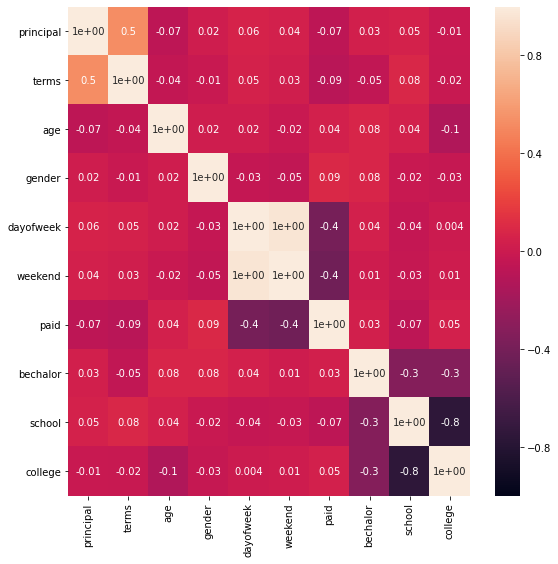

In [24]:
plt.figure(figsize = (len(df_upd.columns) - 1, len(df_upd.columns) - 1))
sns.heatmap(df_upd.corr(), annot = True, fmt = '.1', vmin = -1.0, vmax = 1.0)

In [25]:
df_upd.columns

Index(['principal', 'terms', 'age', 'gender', 'dayofweek', 'weekend', 'paid',
       'bechalor', 'school', 'college'],
      dtype='object')

## Modeling

In [26]:
from sklearn import metrics
from sklearn.metrics import jaccard_score, confusion_matrix, classification_report, log_loss

In [27]:
from sklearn.model_selection import GridSearchCV

In [28]:
def cmatrix_viz(cm, title = 'Confusion Matrix', classes = ['Paid=1', 'Paid=0']):
    plt.imshow(cm, interpolation = 'nearest', cmap = plt.cm.Blues)
    plt.title(title)
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)
    fmt = 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

In [29]:
def data_preparation(input_csv, features, target):
    df = pd.read_csv(input_csv)
    df['due_date'] = pd.to_datetime(df['due_date'])
    df['effective_date'] = pd.to_datetime(df['effective_date'])
    df['dayofweek'] = df['effective_date'].dt.dayofweek
    df['weekend'] = df['dayofweek'].apply(lambda x: 1 if (x > 3)  else 0)
    df['Gender'].replace(to_replace = ['male','female'], value = [0,1], inplace = True)
    df['paid'] = df['loan_status'].replace(to_replace = ['PAIDOFF', 'COLLECTION'], value = [1, 0])
    df = pd.concat([df, pd.get_dummies(df['education'])], axis = 1)
    df.drop(columns = ['education', 'Unnamed: 0', 'Unnamed: 0.1', 'Master or Above', 'effective_date', 'due_date', 'loan_status'], inplace = True)
    df.columns = ['principal', 'terms', 'age', 'gender', 'dayofweek', 'weekend', 'paid', 'bechalor', 'school', 'college']
    X = df[features]
    X = scaler.transform(X)
    y = df[target].values
    
    return X, y

In [66]:
features = [
    'principal',
    'terms',
    'age',
    'gender',
#     'dayofweek', # because of the high correlcation with 'weekend'
    'weekend',
    'bechalor', 
    'college',
#     'school' # because of the high correlcation with 'college'
]

# prepare Standard Scaler
X_check = df_upd[features]
# scaler = preprocessing.StandardScaler().fit(X_check)
# scaler = preprocessing.MinMaxScaler().fit(X_check)
# scaler = preprocessing.MaxAbsScaler().fit(X_check)
# scaler = preprocessing.RobustScaler().fit(X_check)
# scaler = preprocessing.Normalizer().fit(X_check)
# scaler = preprocessing.QuantileTransformer(n_quantiles = len(X_check)).fit(X_check)
scaler = preprocessing.PowerTransformer().fit(X_check)

# Train data
X_train, y_train = data_preparation('loan_train.csv', features, 'paid')

# Test data
X_test, y_test = data_preparation('loan_test.csv', features, 'paid')

## KNN classification

In [67]:
from sklearn.neighbors import KNeighborsClassifier

In [68]:
k_max = 10

mean_acc = np.zeros(k_max)
std_acc = np.zeros(k_max)

for k in range(1, k_max + 1):
    knn_clf = KNeighborsClassifier(n_neighbors = k).fit(X_train, y_train)
    yhat = knn_clf.predict(X_test)
    mean_acc[k - 1] = metrics.accuracy_score(y_test, yhat)
    std_acc[k - 1] = np.std(yhat == y_test) / np.sqrt(yhat.shape[0])
    print('n = {}\tMean acc: {}\tStd: {}'.format(k, mean_acc[k - 1], std_acc[k - 1]))
    
print('k = {} has the best accuracy ({})'.format(mean_acc.argmax() + 1, mean_acc.max()))

n = 1	Mean acc: 0.7777777777777778	Std: 0.05657500857970173
n = 2	Mean acc: 0.6851851851851852	Std: 0.0632025619481797
n = 3	Mean acc: 0.6851851851851852	Std: 0.0632025619481797
n = 4	Mean acc: 0.6666666666666666	Std: 0.06415002990995841
n = 5	Mean acc: 0.6851851851851852	Std: 0.0632025619481797
n = 6	Mean acc: 0.6666666666666666	Std: 0.06415002990995841
n = 7	Mean acc: 0.6851851851851852	Std: 0.0632025619481797
n = 8	Mean acc: 0.6481481481481481	Std: 0.06498605636771093
n = 9	Mean acc: 0.7222222222222222	Std: 0.0609519063522577
n = 10	Mean acc: 0.6666666666666666	Std: 0.06415002990995843
k = 1 has the best accuracy (0.7777777777777778)


In [69]:
knn_clf = KNeighborsClassifier()
params = [
    {
        'n_neighbors': [1, 2, 3, 7, 8],
        'weights': ['uniform', 'distance'],
        'leaf_size': [15, 30, 45, 60]
    }
]

knn_gs = GridSearchCV(knn_clf, param_grid = params, scoring = 'f1_macro', cv = 50).fit(X_train, y_train)
knn_gs.best_params_

{'leaf_size': 30, 'n_neighbors': 8, 'weights': 'uniform'}

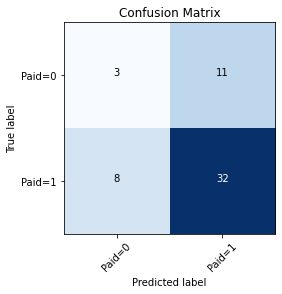

Accuracy: 0.65
Jaccard Score: 0.63
F1-Score: 0.63


		*** Classification Report ***
              precision    recall  f1-score   support

           0       0.27      0.21      0.24        14
           1       0.74      0.80      0.77        40

    accuracy                           0.65        54
   macro avg       0.51      0.51      0.51        54
weighted avg       0.62      0.65      0.63        54



In [70]:
# Train, Score, Evaluate
knn_clf = KNeighborsClassifier(n_neighbors = knn_gs.best_params_['n_neighbors'], leaf_size = knn_gs.best_params_['leaf_size']).fit(X_train, y_train)
yhat = knn_clf.predict(X_test)
accuracy = metrics.accuracy_score(y_test, yhat)
j_score = jaccard_score(y_test, yhat)
cmatrix = confusion_matrix(y_test, yhat, labels = [0, 1])
clf_report = classification_report(y_test, yhat, output_dict = True)

# Visualization
cmatrix_viz(cmatrix, title = 'Confusion Matrix', classes = ['Paid=0', 'Paid=1'])
plt.show()

print('Accuracy: {:.2}'.format(accuracy))
print('Jaccard Score: {:.2}'.format(j_score))
print('F1-Score: {:.2}'.format(clf_report['weighted avg']['f1-score']))
print()
print('\n\t\t*** Classification Report ***')
print(classification_report(y_test, yhat))

## Decision Tree

In [71]:
from sklearn.tree import DecisionTreeClassifier

In [72]:
from  io import StringIO
import pydotplus
import matplotlib.image as mpimg
from sklearn import tree

In [73]:
def visualize_tree(dt_clf):
    dot_data = StringIO()
    filename = "dt_path.png"
    featureNames = X_check.columns
    out = tree.export_graphviz(
        dt_clf,
        feature_names = featureNames,
        out_file = dot_data,
        class_names = np.unique(y_train.astype('str')),
        filled = True,
        special_characters = True,
        rotate = False
    )  
    graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
    graph.write_png(filename)
    img = mpimg.imread(filename)
    plt.figure(figsize=(100, 200))
    plt.imshow(img,interpolation='nearest')

In [74]:
depth_max = 20

for depth in range(4, depth_max + 1):
    dt_clf = DecisionTreeClassifier(criterion = "entropy", max_depth = depth).fit(X_train, y_train)
    yhat = dt_clf.predict(X_test)
    accuracy = metrics.accuracy_score(y_test, yhat)
    j_score = jaccard_score(y_test, yhat)
    print('Accuracy = {:.3} Jaccard Score: {:.3} with max_depth = {}'.format(accuracy, j_score, depth))

Accuracy = 0.759 Jaccard Score: 0.75 with max_depth = 4
Accuracy = 0.704 Jaccard Score: 0.673 with max_depth = 5
Accuracy = 0.704 Jaccard Score: 0.692 with max_depth = 6
Accuracy = 0.704 Jaccard Score: 0.68 with max_depth = 7
Accuracy = 0.741 Jaccard Score: 0.72 with max_depth = 8
Accuracy = 0.704 Jaccard Score: 0.673 with max_depth = 9
Accuracy = 0.667 Jaccard Score: 0.625 with max_depth = 10
Accuracy = 0.667 Jaccard Score: 0.633 with max_depth = 11
Accuracy = 0.667 Jaccard Score: 0.625 with max_depth = 12
Accuracy = 0.685 Jaccard Score: 0.646 with max_depth = 13
Accuracy = 0.685 Jaccard Score: 0.646 with max_depth = 14
Accuracy = 0.685 Jaccard Score: 0.646 with max_depth = 15
Accuracy = 0.685 Jaccard Score: 0.646 with max_depth = 16
Accuracy = 0.704 Jaccard Score: 0.667 with max_depth = 17
Accuracy = 0.704 Jaccard Score: 0.667 with max_depth = 18
Accuracy = 0.704 Jaccard Score: 0.667 with max_depth = 19
Accuracy = 0.685 Jaccard Score: 0.646 with max_depth = 20


In [75]:
params = [
    {
        'criterion': ['gini', 'entropy'],
        'max_depth': [5, 7, 8, 9, 18],
        'splitter': ['best', 'random']
    }
]

dt_gs = GridSearchCV(DecisionTreeClassifier(), param_grid = params, scoring = 'f1_macro', cv = 50).fit(X_train, y_train)
dt_gs.best_params_

{'criterion': 'gini', 'max_depth': 5, 'splitter': 'best'}

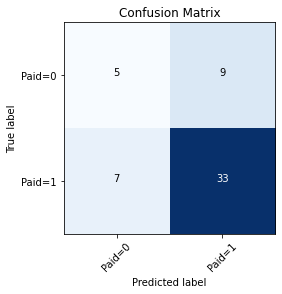

Accuracy: 0.7
Jaccard Score: 0.67
F1-Score: 0.7


		*** Classification Report ***
              precision    recall  f1-score   support

           0       0.42      0.36      0.38        14
           1       0.79      0.82      0.80        40

    accuracy                           0.70        54
   macro avg       0.60      0.59      0.59        54
weighted avg       0.69      0.70      0.70        54



In [76]:
# Train, Score, Evaluate
# max_depth = 7
# criterion = "entropy"
# dt_clf = DecisionTreeClassifier(criterion = "entropy", max_depth = 7).fit(X_train, y_train)
dt_clf = DecisionTreeClassifier(criterion = dt_gs.best_params_['criterion'], max_depth = dt_gs.best_params_['max_depth'], splitter = dt_gs.best_params_['splitter']).fit(X_train, y_train)
yhat = dt_clf.predict(X_test)

accuracy = metrics.accuracy_score(y_test, yhat)
j_score = jaccard_score(y_test, yhat)
cmatrix = confusion_matrix(y_test, yhat, labels = [0, 1])
clf_report = classification_report(y_test, yhat, output_dict = True)

# Visualization
cmatrix_viz(cmatrix, title = 'Confusion Matrix', classes = ['Paid=0', 'Paid=1'])
plt.show()

print('Accuracy: {:.2}'.format(accuracy))
print('Jaccard Score: {:.2}'.format(j_score))
print('F1-Score: {:.2}'.format(clf_report['weighted avg']['f1-score']))
print()
print('\n\t\t*** Classification Report ***')
print(classification_report(y_test, yhat))

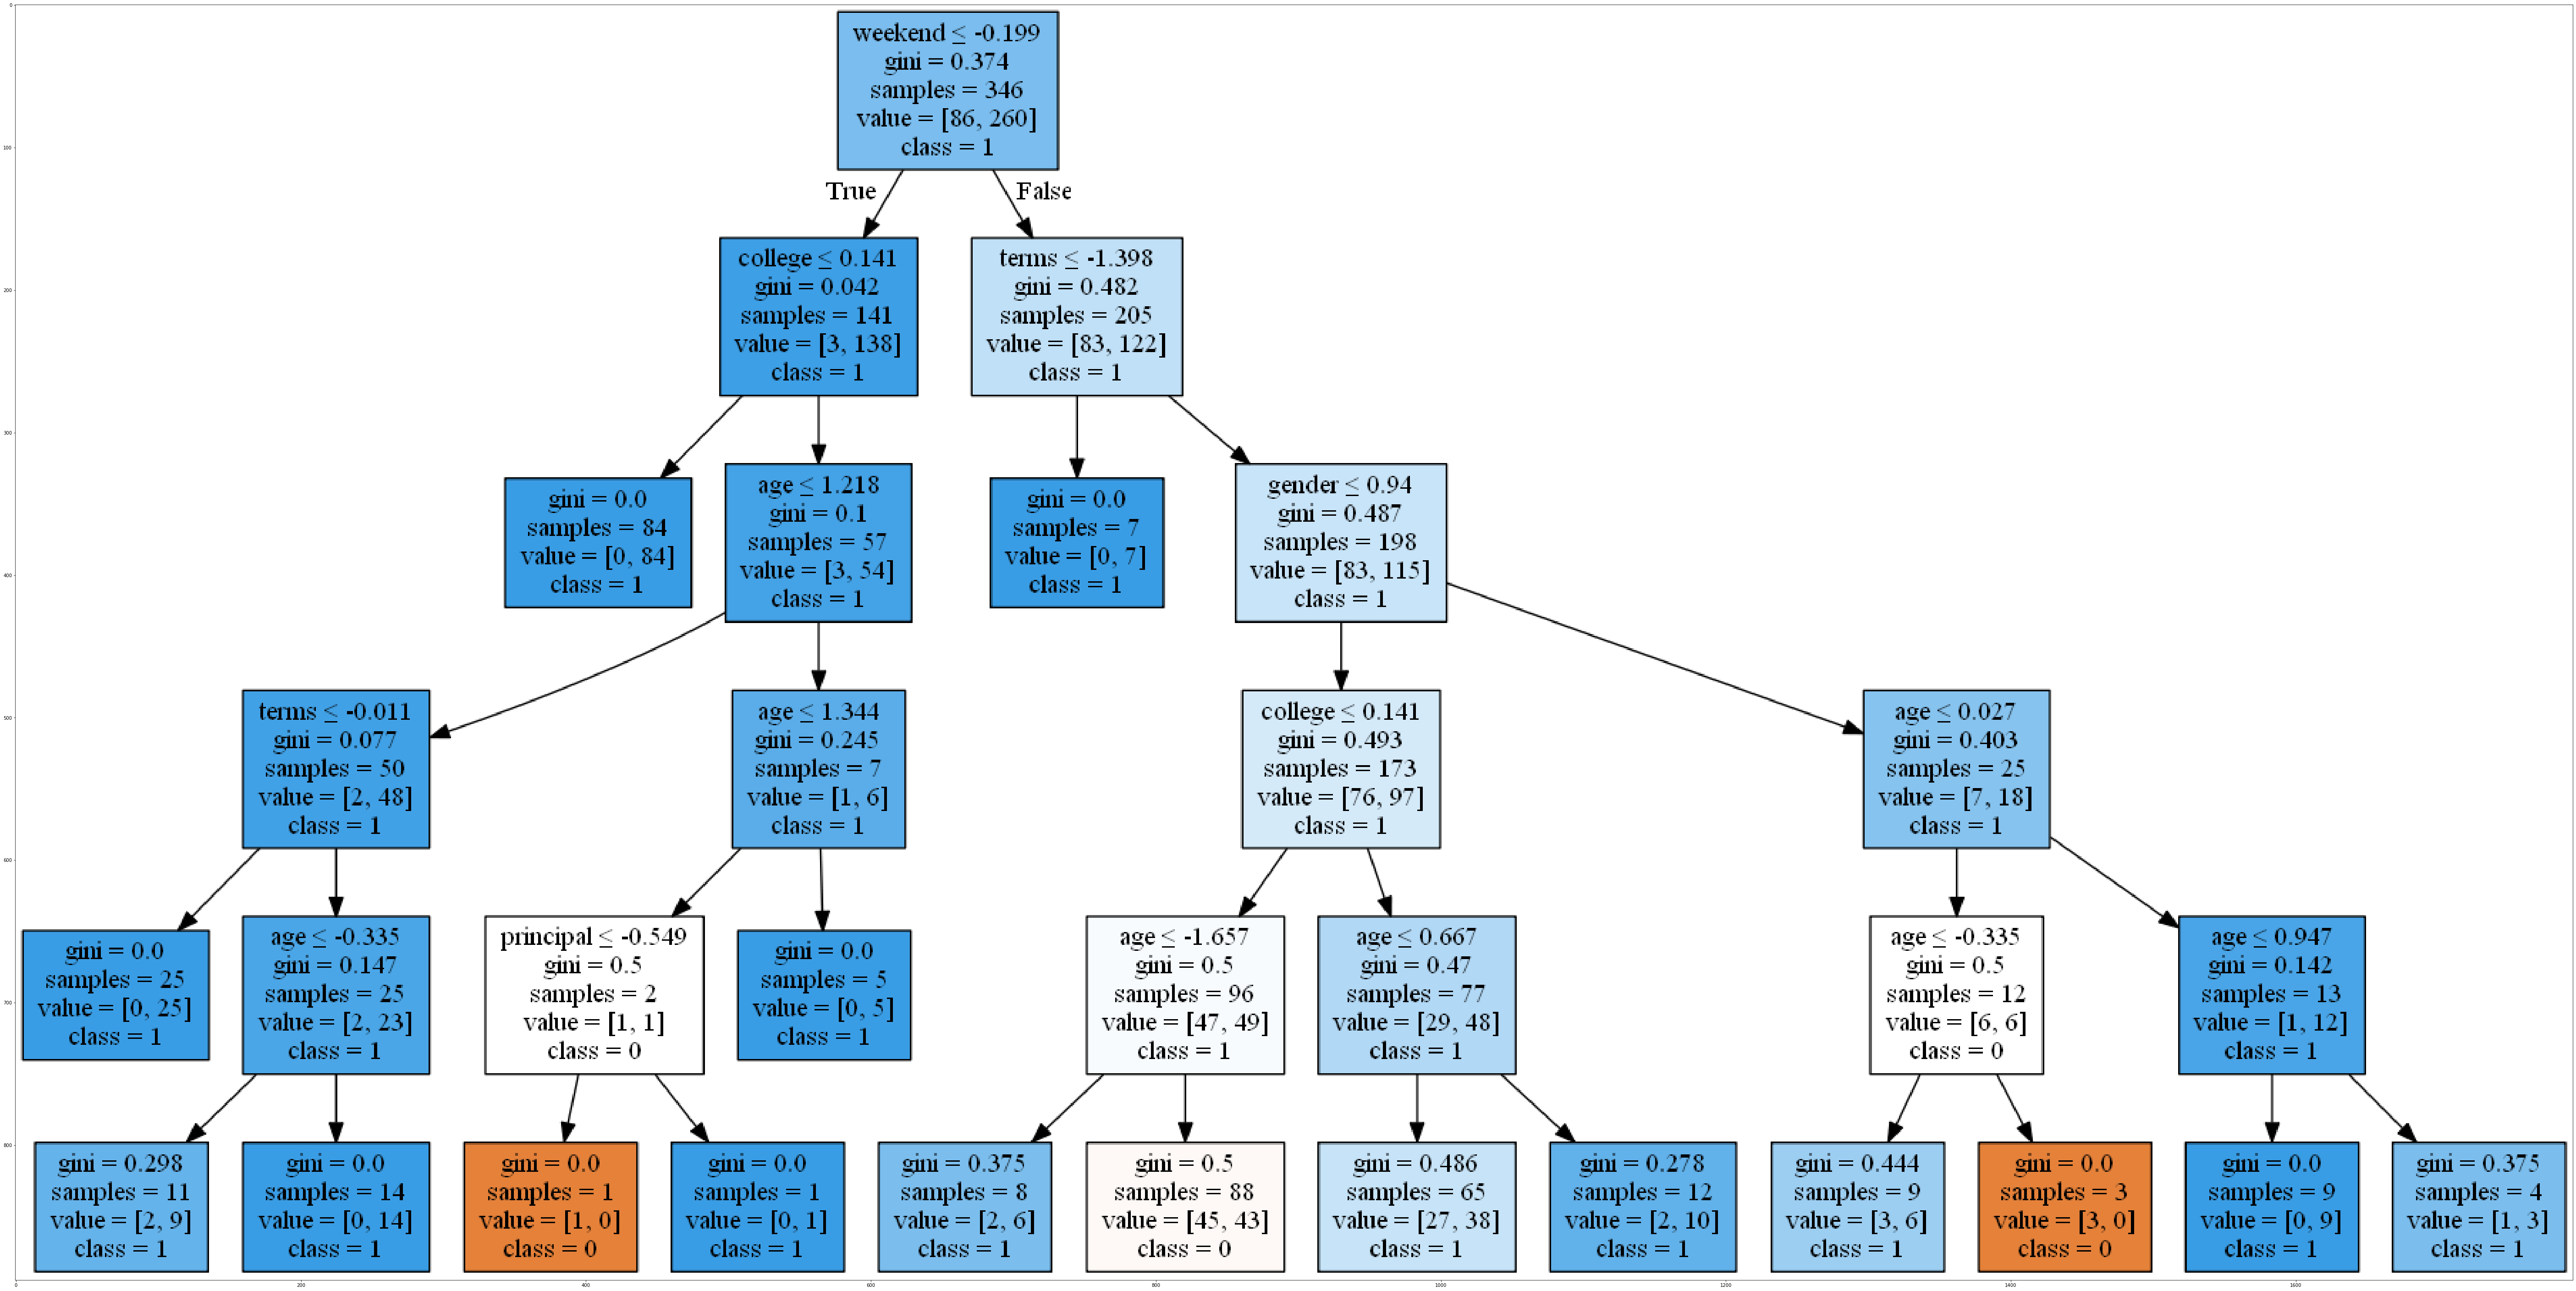

In [77]:
visualize_tree(dt_clf)

## Support Vector Machine

In [78]:
from sklearn import svm

In [79]:
params = [
    {
        'kernel': ['linear', 'poly', 'rbf', 'sigmoid'],
        'C': [0.01, 0.05, 0.1, 0.25, 0.5, 0.75, 1]
    }
]

svm_gs = GridSearchCV(svm.SVC(), param_grid = params, scoring = 'f1_macro', cv = 50).fit(X_train, y_train)
svm_gs.best_params_

{'C': 1, 'kernel': 'sigmoid'}

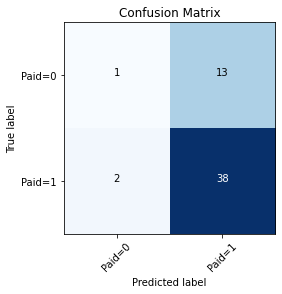

Accuracy: 0.72
Jaccard Score: 0.72
F1-Score: 0.65


		*** Classification Report ***
              precision    recall  f1-score   support

           0       0.33      0.07      0.12        14
           1       0.75      0.95      0.84        40

    accuracy                           0.72        54
   macro avg       0.54      0.51      0.48        54
weighted avg       0.64      0.72      0.65        54



In [80]:
# Train, Score, Evaluate
# svm_clf = svm.SVC(kernel = svm_gs.best_params_['kernel'], C = svm_gs.best_params_['C']).fit(X_train, y_train)
svm_clf = svm.SVC(kernel = 'poly').fit(X_train, y_train)
yhat = svm_clf.predict(X_test)

accuracy = metrics.accuracy_score(y_test, yhat)
j_score = jaccard_score(y_test, yhat)
cmatrix = confusion_matrix(y_test, yhat, labels = [0, 1])
clf_report = classification_report(y_test, yhat, output_dict = True)

# Visualization
cmatrix_viz(cmatrix, title = 'Confusion Matrix', classes = ['Paid=0', 'Paid=1'])
plt.show()

print('Accuracy: {:.2}'.format(accuracy))
print('Jaccard Score: {:.2}'.format(j_score))
print('F1-Score: {:.2}'.format(clf_report['weighted avg']['f1-score']))
print()
print('\n\t\t*** Classification Report ***')
print(classification_report(y_test, yhat))

## Logistic Regression

In [81]:
from sklearn.linear_model import LogisticRegression

In [82]:
params = [
    {
        'C': [0.01, 0.05, 0.1, 0.25, 0.5, 0.75, 1],
        'solver': ['newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga']
    }
]

logreg_gs = GridSearchCV(LogisticRegression(), param_grid = params, scoring = 'f1_macro', cv = 50).fit(X_train, y_train)
logreg_gs.best_params_

{'C': 0.5, 'solver': 'liblinear'}

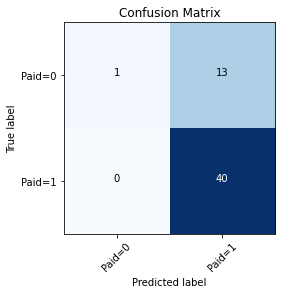

Accuracy: 0.76
Jaccard Score: 0.75
F1-Score: 0.67
Log Loss: 8.315083109267249


		*** Classification Report ***
              precision    recall  f1-score   support

           0       1.00      0.07      0.13        14
           1       0.75      1.00      0.86        40

    accuracy                           0.76        54
   macro avg       0.88      0.54      0.50        54
weighted avg       0.82      0.76      0.67        54



In [83]:
# Train, Score, Evaluate
logreg_clf = LogisticRegression(C = logreg_gs.best_params_['C'], solver = logreg_gs.best_params_['solver']).fit(X_train, y_train)
# logreg_clf = LogisticRegression(solver = 'liblinear', C = 0.01).fit(X_train, y_train)
yhat = logreg_clf.predict(X_test)

accuracy = metrics.accuracy_score(y_test, yhat)
j_score = jaccard_score(y_test, yhat)
cmatrix = confusion_matrix(y_test, yhat, labels = [0, 1])
clf_report = classification_report(y_test, yhat, output_dict = True)
clf_log_loss = log_loss(y_test, yhat)

# Visualization
cmatrix_viz(cmatrix, title = 'Confusion Matrix', classes = ['Paid=0', 'Paid=1'])
plt.show()

print('Accuracy: {:.2}'.format(accuracy))
print('Jaccard Score: {:.2}'.format(j_score))
print('F1-Score: {:.2}'.format(clf_report['weighted avg']['f1-score']))
print('Log Loss: {}'.format(clf_log_loss))
print()
print('\n\t\t*** Classification Report ***')
print(classification_report(y_test, yhat))